In [ ]:
pip install tensorflow-data-validation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.9/99.9 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.5/22.5 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = [
    "Type",
    "Alcohol",
    "Malic_acid",
    "Ash",
    "Alcalinity_of_ash",
    "Magnesium",
    "Total_phenols",
    "Flavanoids",
    "Nonflavanoid_phenols",
    "Proanthocyanins",
    "Color_intensity",
    "Hue",
    "OD280_OD315_of_diluted_wines",
    "Proline"
]

df = pd.read_csv(url, names=column_names)

# Check for missing or NaN values
print(df.isna().sum())



Type                            0
Alcohol                         0
Malic_acid                      0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
OD280_OD315_of_diluted_wines    0
Proline                         0
dtype: int64


The dataset contains 178 entries and 14 columns including target variable.
All the columns have non-null values, so there are no missing values in the dataset.
The data types of the columns are mostly float64, with some int64 columns.

In [ ]:
df.head()

,Type,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# Summary statistics
df.describe()




,Type,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


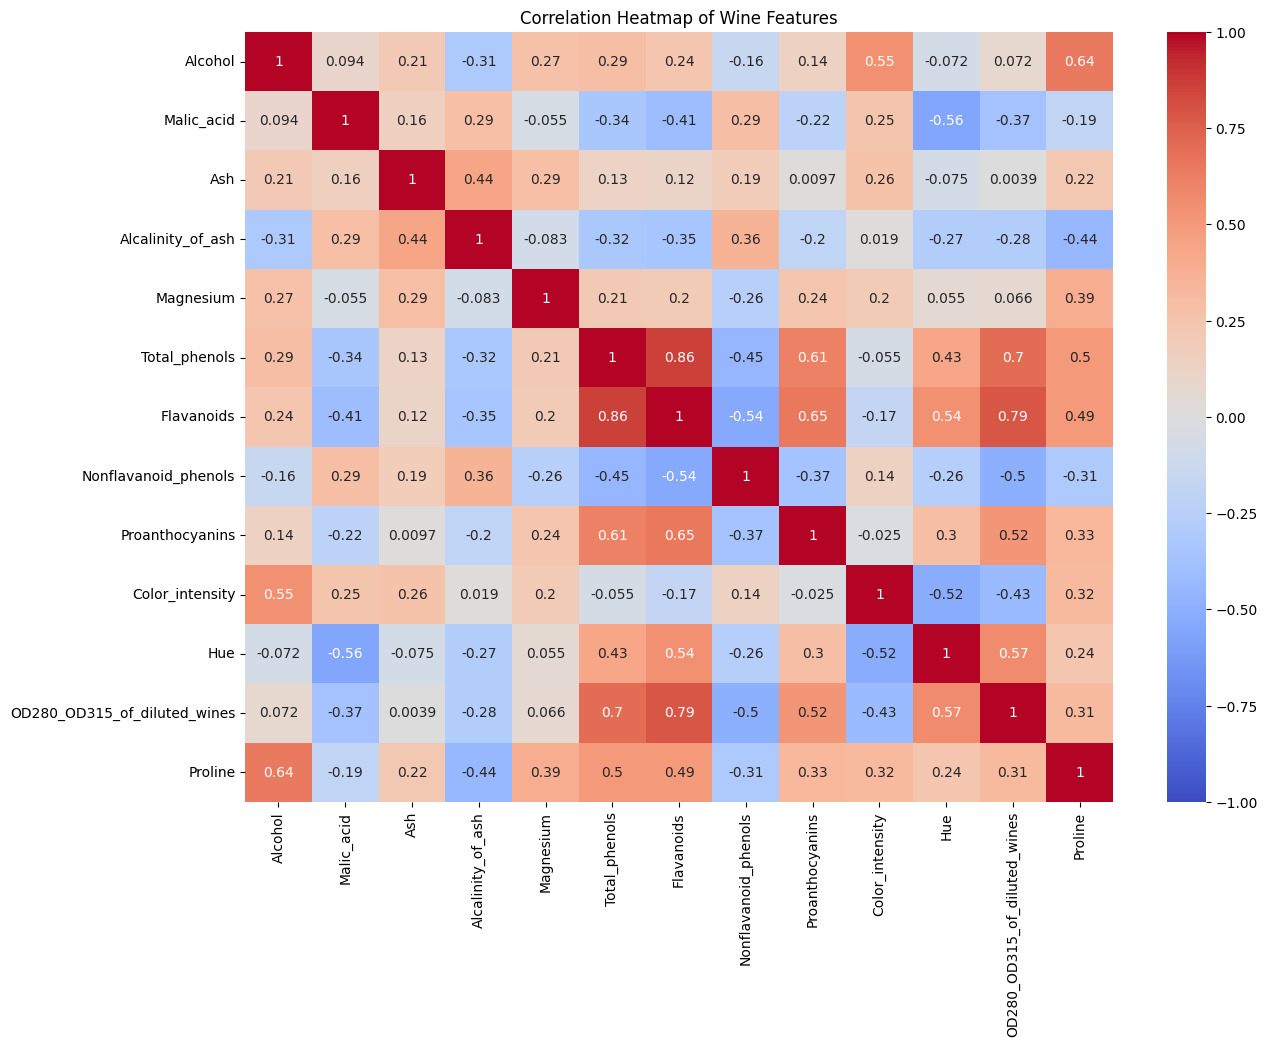

In [ ]:
# Correlation Analysis
correlation_matrix = df.drop("Type", axis=1).corr()

# Plotting the correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Wine Features")
plt.show()

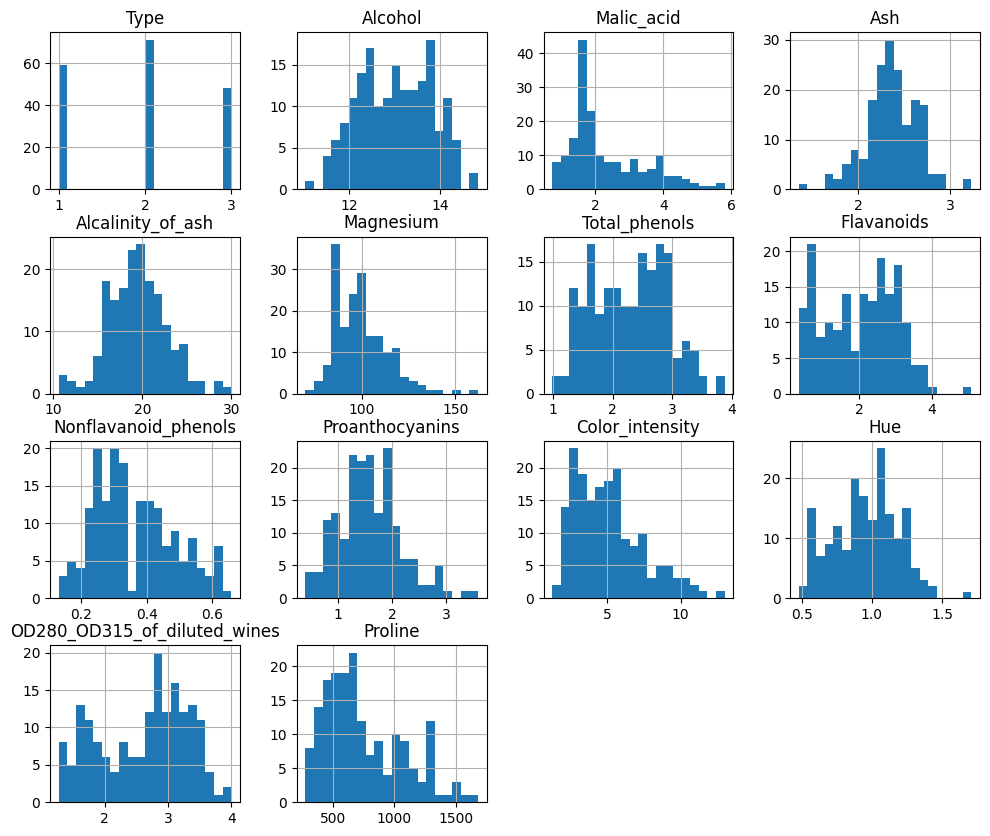

In [ ]:
# Data distribution
import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(12, 10))
plt.show()

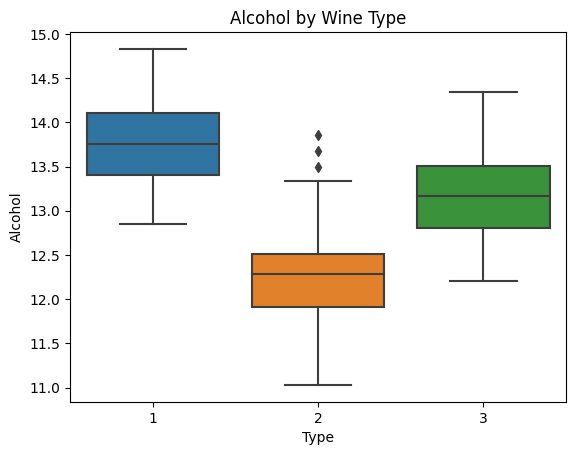

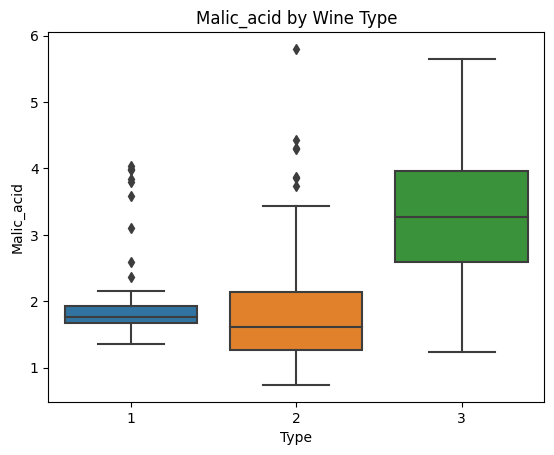

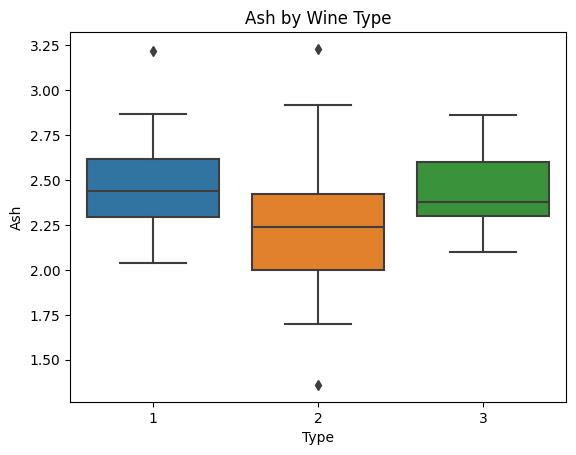

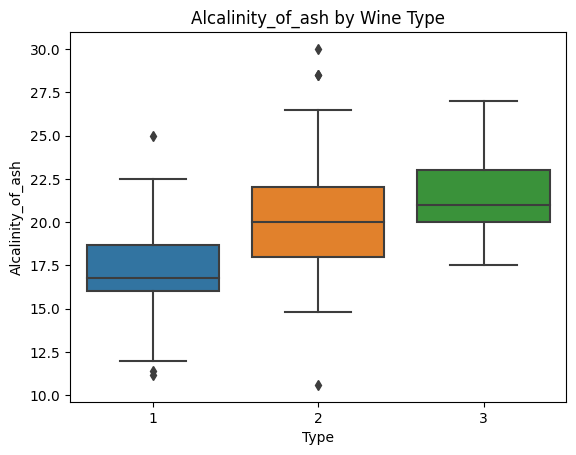

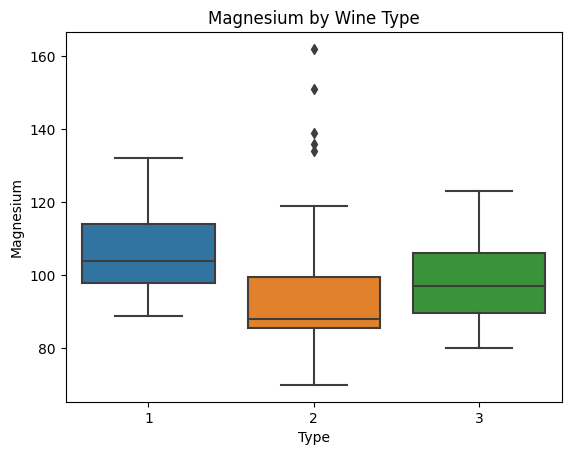

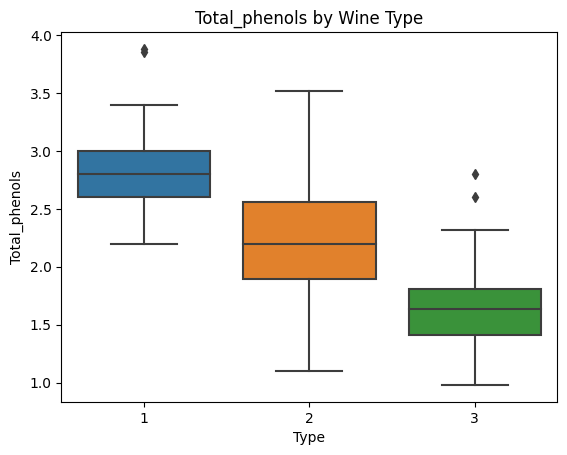

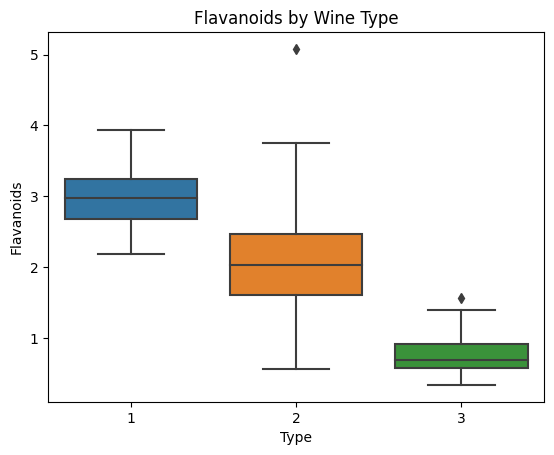

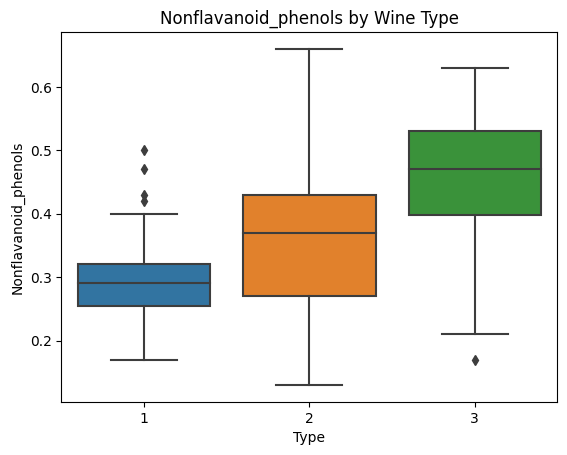

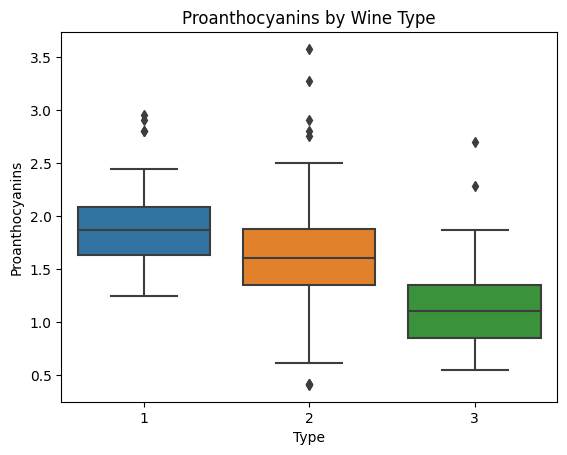

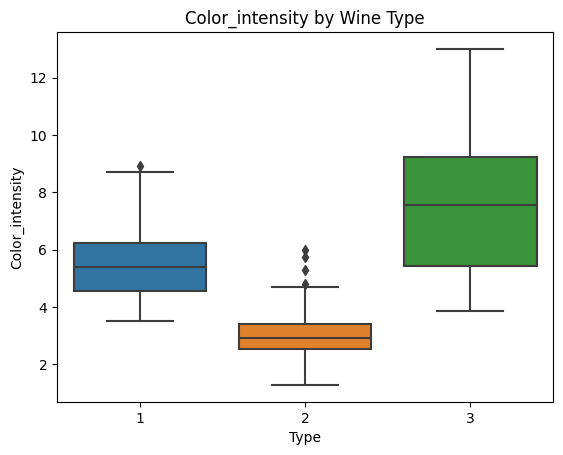

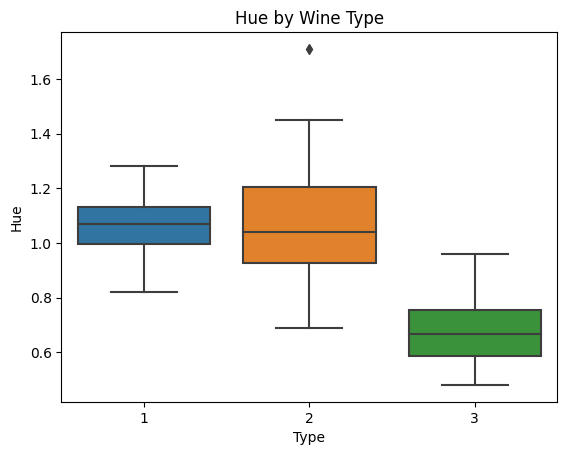

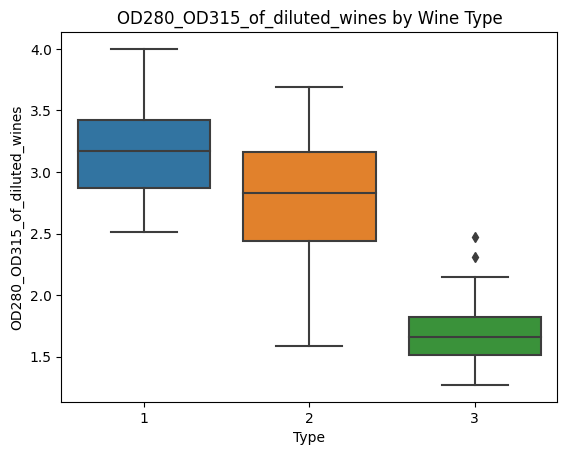

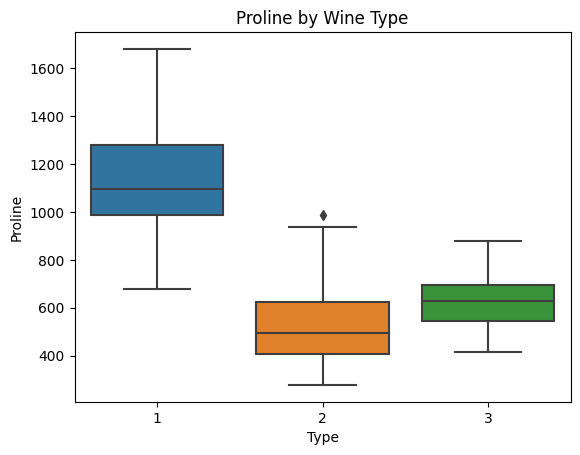

In [ ]:
# Boxplot to visualize the distribution of each feature by wine type
for feature in column_names[1:]:
    sns.boxplot(x="Type", y=feature, data=df)
    plt.title(f"{feature} by Wine Type")
    plt.show()

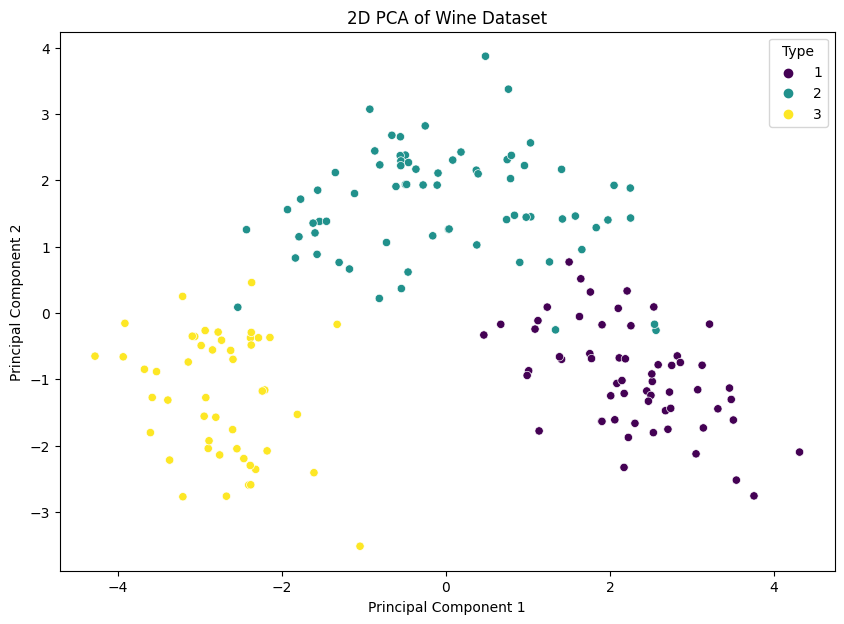

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardizing the data (important for PCA)
scaled_data = StandardScaler().fit_transform(df.drop("Type", axis=1))

# Conducting PCA for 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=["Principal Component 1", "Principal Component 2"])
pca_df["Type"] = df["Type"]

# Plotting the 2D PCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(x="Principal Component 1", y="Principal Component 2", hue="Type", palette="viridis", data=pca_df)
plt.title("2D PCA of Wine Dataset")
plt.show()


In [ ]:
print('Installing TensorFlow Data Validation')
!pip install --upgrade 'tensorflow_data_validation[visualization]<2'

Installing TensorFlow Data Validation
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.0 MB/s eta 0:00:00


In [ ]:
import pkg_resources
import importlib
importlib.reload(pkg_resources)

<module 'pkg_resources' from '/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py'>

In [ ]:
import tensorflow as tf
import tensorflow_data_validation as tfdv
print('TF version:', tf.__version__)
print('TFDV version:', tfdv.version.__version__)

TF version: 2.14.0
TFDV version: 1.14.0


In [ ]:
# Generate dataset statistics using TFDV
statistics = tfdv.generate_statistics_from_dataframe(dataframe=df)

# Now you can visualize the statistics
tfdv.visualize_statistics(statistics)

In [ ]:
schema = tfdv.infer_schema(statistics=statistics)
tfdv.display_schema(schema=schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'Type',INT,required,,-
'Alcohol',FLOAT,required,,-
'Malic_acid',FLOAT,required,,-
'Ash',FLOAT,required,,-
'Alcalinity_of_ash',FLOAT,required,,-
'Magnesium',INT,required,,-
'Total_phenols',FLOAT,required,,-
'Flavanoids',FLOAT,required,,-
'Nonflavanoid_phenols',FLOAT,required,,-


In [ ]:
X = df.drop("Type", axis=1)
y = df["Type"]


In [ ]:
X

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Type, Length: 178, dtype: int64

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train.nunique()

3

In [ ]:
y_train

158    3
137    3
98     2
159    3
38     1
      ..
71     2
106    2
14     1
92     2
102    2
Name: Type, Length: 142, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(142, 13)

The build_model function is defined to create and compile a neural network model. It takes parameters like activation function, learning rate, and the number of training epochs.

The model consists of a sequential stack of layers:
The input layer with 13 neurons, which seems to match the shape of your input data (X_train.shape[1]).

A hidden layer with 8 neurons using the specified activation function.
An output layer with 3 neurons using softmax activation, indicating that it's a multi-class classification problem with 3 classes (wine types).

The model is compiled with the Adam optimizer and sparse categorical cross-entropy loss, which is suitable for integer labels. Accuracy is used as a metric.

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to create and compile the model
def build_model(activation, learning_rate, num_epochs):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(13, activation=activation, input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(8, activation=activation),
        tf.keras.layers.Dense(3, activation='softmax')  # 3 classes for wine types
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' for integer labels
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test, y_test), verbose=1)
    return model, history

# Create and compile the model
model, history = build_model(activation='relu', learning_rate=0.001, num_epochs=2000)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


Epoch 1/2000
5/5 [==============================] - 2s 73ms/step - loss: 58.8338 - accuracy: 0.3169 - val_loss: 45.2605 - val_accuracy: 0.3889
Epoch 2/2000
5/5 [==============================] - 0s 15ms/step - loss: 47.6035 - accuracy: 0.3169 - val_loss: 36.5355 - val_accuracy: 0.3889
Epoch 3/2000
5/5 [==============================] - 0s 10ms/step - loss: 39.0390 - accuracy: 0.3169 - val_loss: 30.9214 - val_accuracy: 0.3889
Epoch 4/2000
5/5 [==============================] - 0s 15ms/step - loss: 32.8508 - accuracy: 0.3169 - val_loss: 25.0994 - val_accuracy: 0.3889
Epoch 5/2000
5/5 [==============================] - 0s 17ms/step - loss: 26.3115 - accuracy: 0.3169 - val_loss: 19.2147 - val_accuracy: 0.3889
Epoch 6/2000
5/5 [==============================] - 0s 15ms/step - loss: 19.7014 - accuracy: 0.3169 - val_loss: 13.1612 - val_accuracy: 0.3889
Epoch 7/2000
5/5 [==============================] - 0s 15ms/step - loss: 13.2309 - accuracy: 0.3169 - val_loss: 6.9117 - val_accuracy: 0.3889


In [ ]:
from sklearn.metrics import confusion_matrix

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(confusion)

2/2 [==============================] - 0s 13ms/step
Confusion Matrix:
[[13  1  0]
 [ 0 14  0]
 [ 0  0  8]]


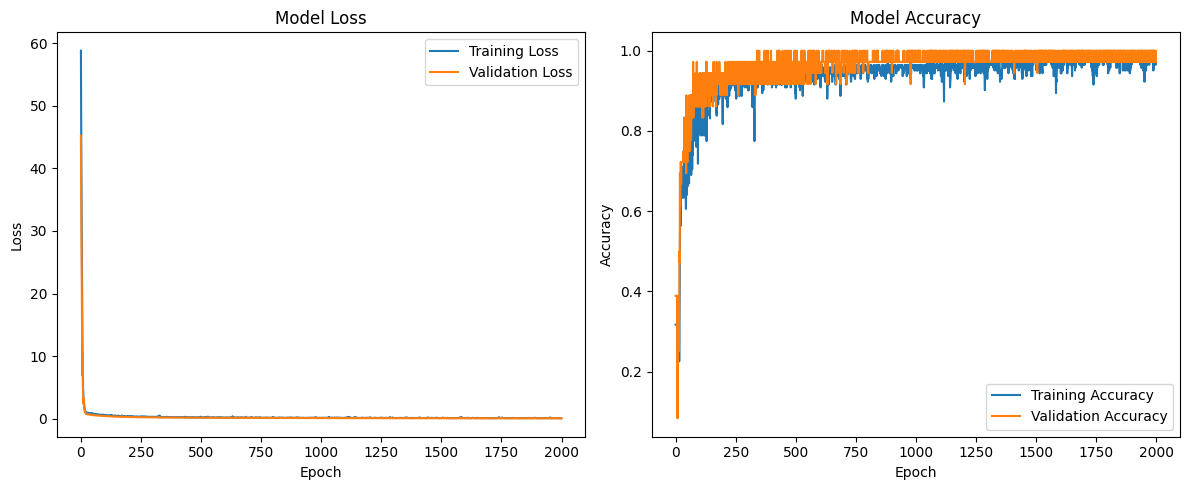

In [ ]:
import matplotlib.pyplot as plt



# Extract the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Create subplots
plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
!pip install scikeras

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

# Your data loading and splitting code here...

# Define a function to create and compile the model
def create_model(activation='relu', learning_rate=0.001):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(13, activation=activation, input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(8, activation=activation),
        tf.keras.layers.Dense(3, activation='softmax')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Wrap the Keras model with KerasClassifier
model = KerasClassifier(model=create_model, verbose=0)  # Remove the epochs parameter here

# Define the hyperparameters and their possible values
param_grid = {
    'model__activation': ['relu', 'tanh', 'sigmoid'],
    'model__learning_rate': [0.1, 0.01, 0.001],
    'epochs': [500, 1000, 2000]  # Adding epochs to the param_grid
}

# Set up GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Print the results
print(f"Best accuracy: {grid_result.best_score_} using {grid_result.best_params_}")


Best accuracy: 0.8655437352245863 using {'epochs': 2000, 'model__activation': 'relu', 'model__learning_rate': 0.001}


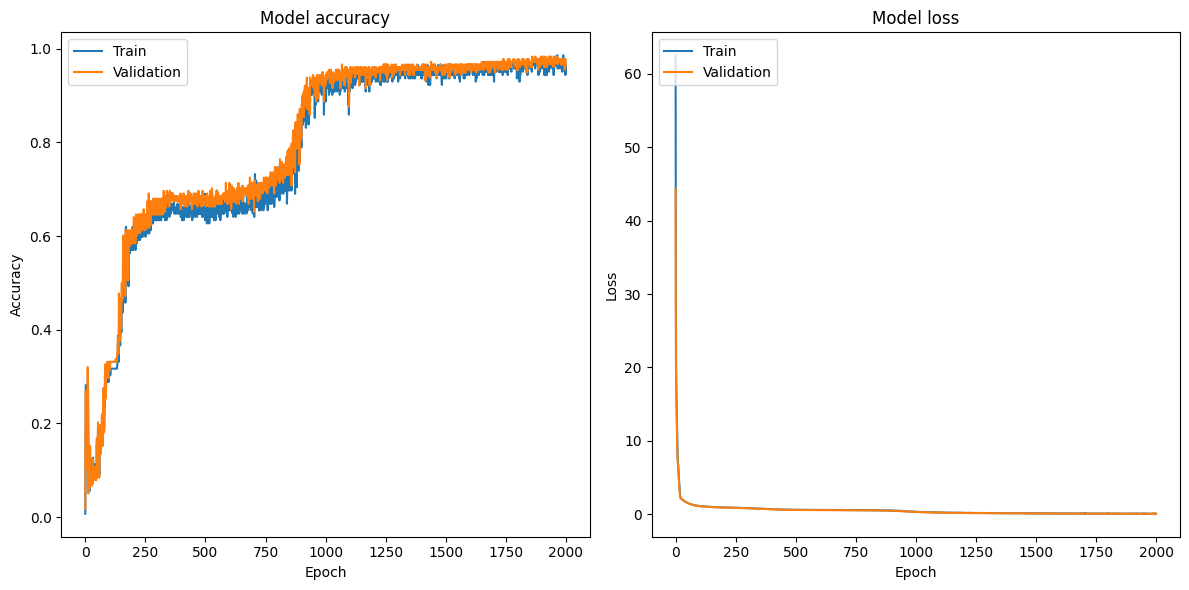

In [ ]:
import matplotlib.pyplot as plt

# Get the best hyperparameters from the grid search
best_params = grid.best_params_

# Create and compile the model with the best hyperparameters
best_model = create_model(activation=best_params['model__activation'], learning_rate=best_params['model__learning_rate'])

# Fit the model to the training data
history = best_model.fit(X_train, y_train, validation_data=(X, y), epochs=2000, verbose=0)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


#### Manual Hyperparameter Tuning (Experimental)

In [ ]:
# Define the parameter ranges for tuning
activations = ['relu', 'sigmoid']
learning_rates = [0.1, 0.01, 0.001, 0.0001]
num_epochs_list = [500, 1000, 2000]

best_model = None
best_accuracy = 0.0
best_params = {}
best_history = None

# Perform hyperparameter tuning
for activation in activations:
    for learning_rate in learning_rates:
        for num_epochs in num_epochs_list:
            model, history = build_model(activation, learning_rate, num_epochs)
            test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

            if test_accuracy > best_accuracy:
                best_model = model
                best_accuracy = test_accuracy
                best_params = {
                    'activation': activation,
                    'learning_rate': learning_rate,
                    'num_epochs': num_epochs
                }
                best_history = history  # Store the best history

            # Print information for each combination
            print(f"Hyperparameters: Activation={activation}, Learning Rate={learning_rate}, Epochs={num_epochs}")
            print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}\n")

# Save the best model
best_model.save('best_model.h5')

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Test Accuracy with Best Model:", best_accuracy)

# Print the Confusion Matrix for the best model
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
confusion = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:\n", confusion)


Streaming output truncated to the last 5000 lines.
Epoch 505/1000
5/5 [==============================] - 0s 21ms/step - loss: 1.1477 - accuracy: 0.4014 - val_loss: 1.1410 - val_accuracy: 0.3889
Epoch 506/1000
5/5 [==============================] - 0s 21ms/step - loss: 1.1474 - accuracy: 0.4014 - val_loss: 1.1406 - val_accuracy: 0.3889
Epoch 507/1000
5/5 [==============================] - 0s 19ms/step - loss: 1.1470 - accuracy: 0.4014 - val_loss: 1.1401 - val_accuracy: 0.3889
Epoch 508/1000
5/5 [==============================] - 0s 22ms/step - loss: 1.1467 - accuracy: 0.4014 - val_loss: 1.1396 - val_accuracy: 0.3889
Epoch 509/1000
5/5 [==============================] - 0s 20ms/step - loss: 1.1464 - accuracy: 0.4014 - val_loss: 1.1392 - val_accuracy: 0.3889
Epoch 510/1000
5/5 [==============================] - 0s 19ms/step - loss: 1.1460 - accuracy: 0.4014 - val_loss: 1.1387 - val_accuracy: 0.3889
Epoch 511/1000
5/5 [==============================] - 0s 22ms/step - loss: 1.1457 - accurac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 13ms/step
Confusion Matrix:
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


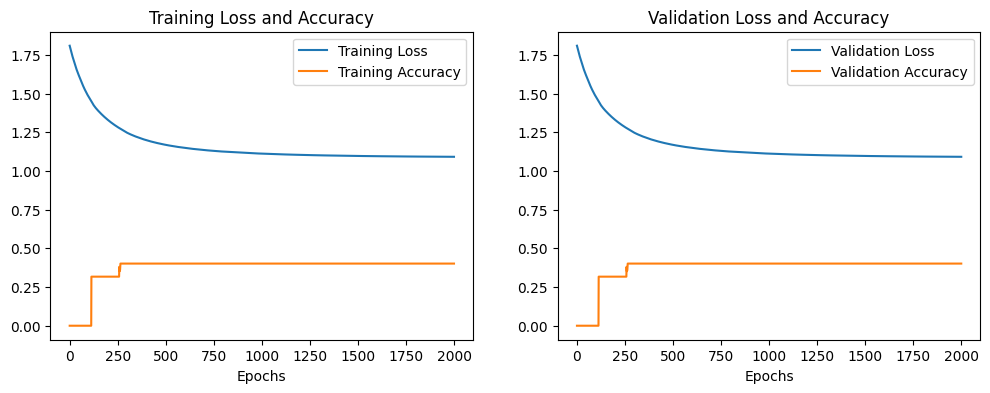

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.title('Training Loss and Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.title('Validation Loss and Accuracy')
plt.show()
